# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Findings:
#temperatures are warmer from -20 to 20 lat
#as lat increases, temp decreases
#lats between 40 and 60 have a higher humidity percent than other locations (tends to be 80-100% humidity)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
tempCities=pd.DataFrame(cities)
tempCities[0][0]

'gornyak'

In [6]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q=dekar"
response = requests.get(query_url).json()
response

{'coord': {'lon': 21.93, 'lat': -21.53},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 74.97,
  'feels_like': 74.75,
  'temp_min': 74.97,
  'temp_max': 74.97,
  'pressure': 1013,
  'humidity': 59,
  'sea_level': 1013,
  'grnd_level': 889},
 'wind': {'speed': 5.97, 'deg': 357},
 'clouds': {'all': 100},
 'dt': 1580153507,
 'sys': {'country': 'BW', 'sunrise': 1580098225, 'sunset': 1580145546},
 'timezone': 7200,
 'id': 933815,
 'name': 'Dekar',
 'cod': 200}

In [23]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=d235cc0d4979e132a114b7e11dced52d&units=imperial&q=dekar'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# stupid Loop
cities = pd.DataFrame(cities)
weather_results = []
url = "http://api.openweathermap.org/data/2.5/weather"

#print("Beginning Data Retrieval")
#print("-----------------------------")
for city in cities.iterrows(): 
    params = {
        "q": city[1][0],
        "appid": weather_api_key,
        "units": 'imperial',
    }
    
    print(f"City : {city[1][0]}")
    #print(f"City Number : {id}")
    results = requests.get(url, params=params).json()
    weather_results.append(results)
    time.sleep(1.5)

City : gornyak
City : fairbanks
City : nome
City : leshukonskoye
City : huambo
City : victoria point
City : tiksi
City : pevek
City : clarence town
City : dolores
City : georgetown
City : belaya gora
City : chuy
City : sur
City : coihaique
City : lincoln
City : hermanus
City : borogontsy
City : beaver dam
City : attawapiskat
City : maiduguri
City : mataura
City : zhigansk
City : east london
City : samusu
City : vardo
City : fortuna
City : maralal
City : kahului
City : dipkarpaz
City : rikitea
City : cape town


ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=cape+town&appid=d235cc0d4979e132a114b7e11dced52d&units=imperial (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DB4F4D6308>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [43]:
#THIS DOESN'T WORK. STR ATTRIBUTE ERRORS but i don't understand why
#id=[]
#cityName=[]
#cloudiness=[]
#country=[]
#date=[]
#humidity=[]
#long=[]
#lat=[]
#temp=[]
#max_temp =[]
#wind_speed=[]
#counter=0
#units = "imperial"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={weather_api_key}&units={units}&q="
#weather_data = requests.get(query_url + city).json()

#for city in cities:
 #       weather_data = requests.get(query_url + city).json()
 #       #weather_data = response.json()
 #       id.append(counter)
 #       cityName.append(weather_data['name'])
 #       cloudiness.append(weather_data['weather'][counter]['description'])
 #       cloudiness_number.append(weather_data['clouds']['all'])
 #       country.append(weather_data['sys']['country'])
 #       date.append(weather_data['dt'])
 #       humidity.append(weather_data['main']['humidity'])
 #       long.append(weather_data['coord']['lon'])
 #       lat.append(weather_data['coord']['lat'])
 #       temp.append(weather_data['main']['temp'])
 #       max_temp.append(weather_data['main']['temp_max'])
 #       wind_speed.append(weather_data['wind']['speed'])
 #       time.sleep(1.5)
 #       counter+=1

#except KeyError:
 #       print("skip error")

#print(f"The city name is: {city}")
#print(f"The city number is: {city_number}")


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities[0]

0         punta arenas
1                 lebu
2              mataura
3              aklavik
4              rikitea
            ...       
593    lazaro cardenas
594             sangar
595             xuddur
596            yenagoa
597       ballyshannon
Name: 0, Length: 598, dtype: object

In [5]:
weather_results_df = pd.DataFrame(weather_results)
weather_results_df.to_csv('Weather_output.csv')
weather_results_df = weather_results_df.dropna(how="all")
weather_results_df.head()


,coord,weather,base,main,wind,snow,clouds,dt,sys,timezone,id,name,cod,visibility,rain,message
0,"{'lon': 81.47, 'lat': 50.99}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': 6.46, 'feels_like': -8.55, 'temp_min'...","{'speed': 15.84, 'deg': 260}",{'3h': 0.38},{'all': 100},1.580252e+09,"{'country': 'RU', 'sunrise': 1580264180, 'suns...",25200.0,1506260.0,Gornyak,200,NaN,NaN,NaN
1,"{'lon': -147.72, 'lat': 64.84}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -22.4, 'feels_like': -31.22, 'temp_mi...","{'speed': 3.27, 'deg': 19}",NaN,{'all': 1},1.580252e+09,"{'type': 1, 'id': 7684, 'country': 'US', 'sunr...",-32400.0,5861897.0,Fairbanks,200,16093.0,NaN,NaN
2,"{'lon': -165.41, 'lat': 64.5}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -18.4, 'feels_like': -28.62, 'temp_mi...","{'speed': 5.82, 'deg': 20}",NaN,{'all': 1},1.580252e+09,"{'type': 1, 'id': 7770, 'country': 'US', 'sunr...",-32400.0,5870133.0,Nome,200,16093.0,NaN,NaN
3,"{'lon': 45.76, 'lat': 64.9}","[{'id': 801, 'main': 'Clouds', 'description': ...",model,"{'temp': -7.53, 'feels_like': -16.65, 'temp_mi...","{'speed': 4.47, 'deg': 188}",NaN,{'all': 21},1.580252e+09,"{'country': 'RU', 'sunrise': 1580277341, 'suns...",10800.0,535839.0,Leshukonskoye,200,NaN,NaN,NaN
4,"{'lon': 15.74, 'lat': -12.78}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 60.71, 'feels_like': 62.51, 'temp_min...","{'speed': 2.15, 'deg': 109}",NaN,{'all': 100},1.580252e+09,"{'country': 'AO', 'sunrise': 1580186933, 'suns...",3600.0,3348313.0,Huambo,200,NaN,{'3h': 1.06},NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

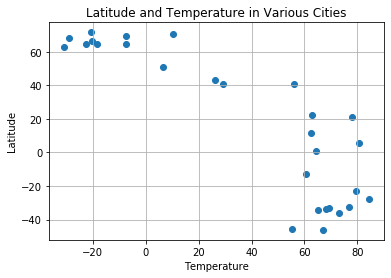

In [6]:
# Create a Scatter Plot for temperature vs latitude
x=[]
y=[]

for index, weatherstuff in weather_results_df.iterrows():
    try:
        x.append(weather_results_df['main'][index]['temp'])
        y.append(weather_results_df['coord'][index]['lat'])
    except Exception:
        continue
        
plt.scatter(x, y, marker="o")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("Latitude and Temperature in Various Cities")
plt.grid()
plt.savefig("Latitude and Temperature in Various Cities.png")
plt.show()

#### Latitude vs. Humidity Plot

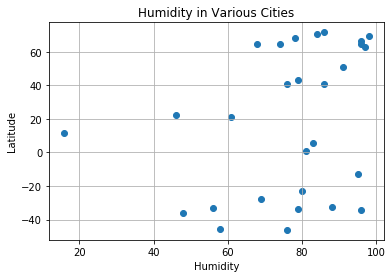

<Figure size 432x288 with 0 Axes>

In [7]:
# Build a scatter plot for each data type
x=[]
y=[]

for index, weatherstuff in weather_results_df.iterrows():
    try:
        x.append(weather_results_df['main'][index]['humidity'])
        y.append(weather_results_df['coord'][index]['lat'])
    except Exception:
        continue
        
plt.scatter(x, y, marker="o")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Humidity in Various Cities")
plt.grid()
plt.show()
plt.savefig("Humidity in Various Cities.png")
plt.show()

#### Latitude vs. Cloudiness Plot

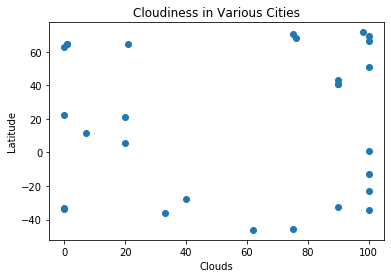

In [8]:
# Build a scatter plot for each data type
x=[]
y=[]

for index, weatherstuff in weather_results_df.iterrows():
    try:
        x.append(weather_results_df['clouds'][index]['all'])
        y.append(weather_results_df['coord'][index]['lat'])
    except Exception:
        continue
        
plt.scatter(x, y, marker="o")
plt.xlabel('Clouds')
plt.ylabel('Latitude')
plt.title("Cloudiness in Various Cities")
plt.grid
plt.savefig("Cloudiness in Various Cities.png")
plt.show()


#### Latitude vs. Wind Speed Plot

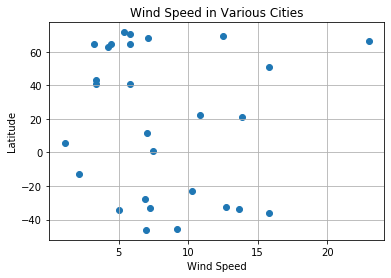

In [9]:
# Build a scatter plot for each data type
x=[]
y=[]

for index, weatherstuff in weather_results_df.iterrows():
    try:
        x.append(weather_results_df['wind'][index]['speed'])
        y.append(weather_results_df['coord'][index]['lat'])
    except Exception:
        continue
        
plt.scatter(x, y, marker="o")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Wind Speed in Various Cities")
plt.savefig("Wind Speed in Various Cities.png")
plt.grid()
plt.show()


## Linear Regression

The r-squared is: -0.8638877815946893


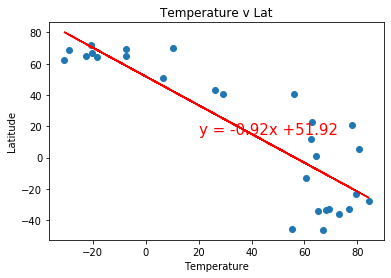

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude

x_values=[]
y_values=[]

for index, weatherstuff in weather_results_df.iterrows():
    try:
        x_values.append(weather_results_df['main'][index]['temp'])
        y_values.append(weather_results_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x_values)

#plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values 
regress_values = x_value_df * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Temperature v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#Show plot
#plt.show()


In [11]:
# Create Northern and Southern Hemisphere DataFrames
#weather_results_df['northern'] = ""
#weather_results_df['southern'] = ""

n = []
s= []

for index, weatherstuff in weather_results_df.iterrows():
    try:
        if weather_results_df['coord'][index]['lat']>0:
            n.append(weatherstuff)
        else:
            s.append(weatherstuff)
    except Exception:
            continue
#len(n)   
northern_df = pd.DataFrame(n)
southern_df = pd.DataFrame(s)
northern_df

,coord,weather,base,main,wind,snow,clouds,dt,sys,timezone,id,name,cod,visibility,rain,message
0,"{'lon': 81.47, 'lat': 50.99}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': 6.46, 'feels_like': -8.55, 'temp_min'...","{'speed': 15.84, 'deg': 260}",{'3h': 0.38},{'all': 100},1.580252e+09,"{'country': 'RU', 'sunrise': 1580264180, 'suns...",25200.0,1506260.0,Gornyak,200,NaN,NaN,NaN
1,"{'lon': -147.72, 'lat': 64.84}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -22.4, 'feels_like': -31.22, 'temp_mi...","{'speed': 3.27, 'deg': 19}",NaN,{'all': 1},1.580252e+09,"{'type': 1, 'id': 7684, 'country': 'US', 'sunr...",-32400.0,5861897.0,Fairbanks,200,16093.0,NaN,NaN
2,"{'lon': -165.41, 'lat': 64.5}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -18.4, 'feels_like': -28.62, 'temp_mi...","{'speed': 5.82, 'deg': 20}",NaN,{'all': 1},1.580252e+09,"{'type': 1, 'id': 7770, 'country': 'US', 'sunr...",-32400.0,5870133.0,Nome,200,16093.0,NaN,NaN
3,"{'lon': 45.76, 'lat': 64.9}","[{'id': 801, 'main': 'Clouds', 'description': ...",model,"{'temp': -7.53, 'feels_like': -16.65, 'temp_mi...","{'speed': 4.47, 'deg': 188}",NaN,{'all': 21},1.580252e+09,"{'country': 'RU', 'sunrise': 1580277341, 'suns...",10800.0,535839.0,Leshukonskoye,200,NaN,NaN,NaN
6,"{'lon': 128.87, 'lat': 71.69}","[{'id': 804, 'main': 'Clouds', 'description': ...",model,"{'temp': -20.56, 'feels_like': -30.51, 'temp_m...","{'speed': 5.39, 'deg': 207}",NaN,{'all': 98},1.580252e+09,"{'country': 'RU', 'sunrise': 1580264381, 'suns...",32400.0,2015306.0,Tiksi,200,NaN,NaN,NaN
7,"{'lon': 170.31, 'lat': 69.7}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': -7.58, 'feels_like': -21.21, 'temp_mi...","{'speed': 12.5, 'deg': 322}",{'3h': 0.19},{'all': 100},1.580252e+09,"{'country': 'RU', 'sunrise': 1580251329, 'suns...",43200.0,2122090.0,Pevek,200,NaN,NaN,NaN
10,"{'lon': 100.34, 'lat': 5.41}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 80.73, 'feels_like': 90.48, 'temp_min...",{'speed': 1.12},NaN,{'all': 20},1.580252e+09,"{'type': 1, 'id': 9438, 'country': 'MY', 'sunr...",28800.0,1735106.0,George Town,200,9000.0,NaN,NaN
11,"{'lon': 146.42, 'lat': 68.53}","[{'id': 803, 'main': 'Clouds', 'description': ...",model,"{'temp': -28.82, 'feels_like': -39.86, 'temp_m...","{'speed': 7.09, 'deg': 198}",NaN,{'all': 76},1.580252e+09,"{'country': 'RU', 'sunrise': 1580255828, 'suns...",39600.0,2126785.0,Belaya Gora,200,NaN,NaN,NaN
13,"{'lon': 59.53, 'lat': 22.57}","[{'id': 800, 'main': 'Clear', 'description': '...",model,"{'temp': 62.74, 'feels_like': 54.73, 'temp_min...","{'speed': 10.85, 'deg': 338}",NaN,{'all': 0},1.580252e+09,"{'country': 'OM', 'sunrise': 1580265732, 'suns...",14400.0,286245.0,Sur,200,NaN,NaN,NaN
15,"{'lon': -96.67, 'lat': 40.8}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 29.19, 'feels_like': 22.89, 'temp_min...","{'speed': 3.36, 'deg': 30}",NaN,{'all': 90},1.580252e+09,"{'type': 1, 'id': 3248, 'country': 'US', 'sunr...",-21600.0,5072006.0,Lincoln,200,16093.0,NaN,NaN


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

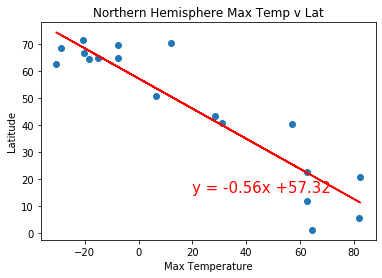

In [12]:
x=[]
y=[]

for index, weatherstuff in northern_df.iterrows():
    try:
        x.append(northern_df['main'][index]['temp_max'])
        y.append(northern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Max Temp v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

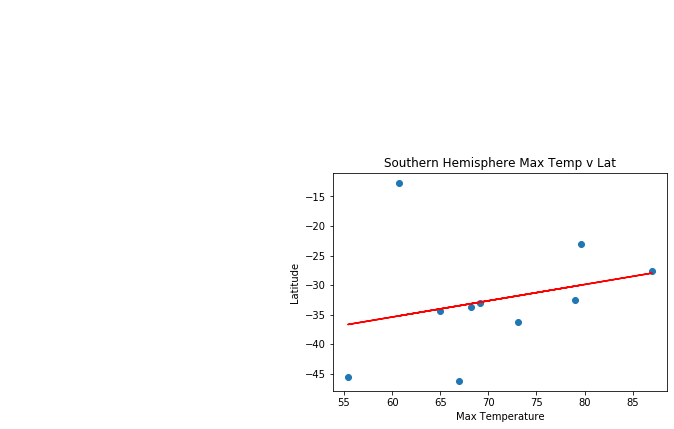

In [13]:
x=[]
y=[]

for index, weatherstuff in southern_df.iterrows():
    try:
        x.append(southern_df['main'][index]['temp_max'])
        y.append(southern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Max Temp v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()





####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

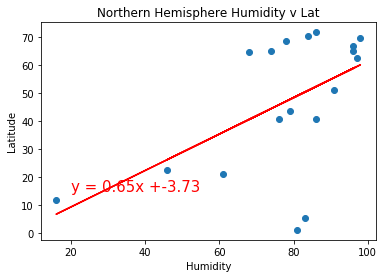

In [14]:
x=[]
y=[]

for index, weatherstuff in northern_df.iterrows():
    try:
        x.append(northern_df['main'][index]['humidity'])
        y.append(northern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Humidity v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

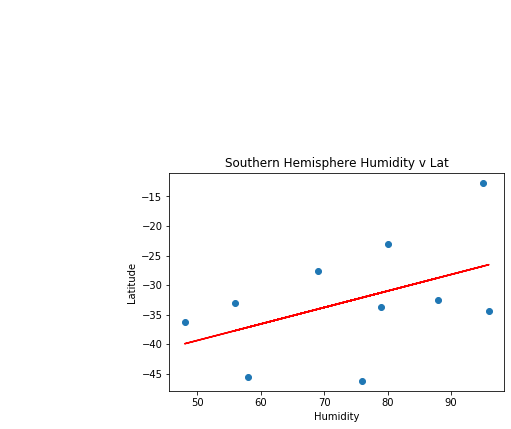

In [15]:
x=[]
y=[]

for index, weatherstuff in southern_df.iterrows():
    try:
        x.append(southern_df['main'][index]['humidity'])
        y.append(southern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Humidity v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

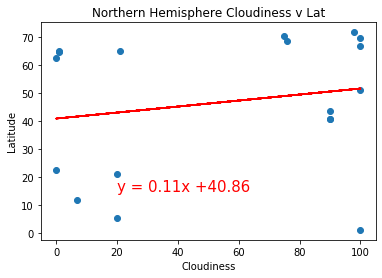

In [16]:
x=[]
y=[]

for index, weatherstuff in northern_df.iterrows():
    try:
        x.append(northern_df['clouds'][index]['all'])
        y.append(northern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Cloudiness v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

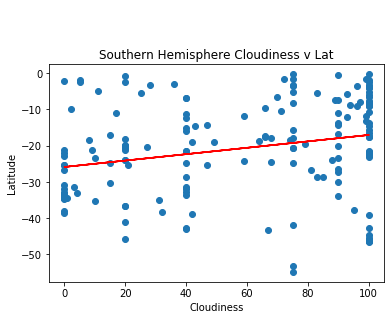

In [25]:
x=[]
y=[]

for index, weatherstuff in southern_df.iterrows():
    try:
        x.append(southern_df['clouds'][index]['all'])
        y.append(southern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Cloudiness v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

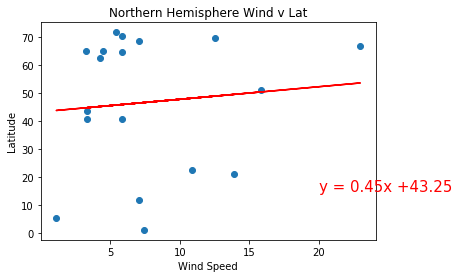

In [17]:
x=[]
y=[]

for index, weatherstuff in northern_df.iterrows():
    try:
        x.append(northern_df['wind'][index]['speed'])
        y.append(northern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Wind v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

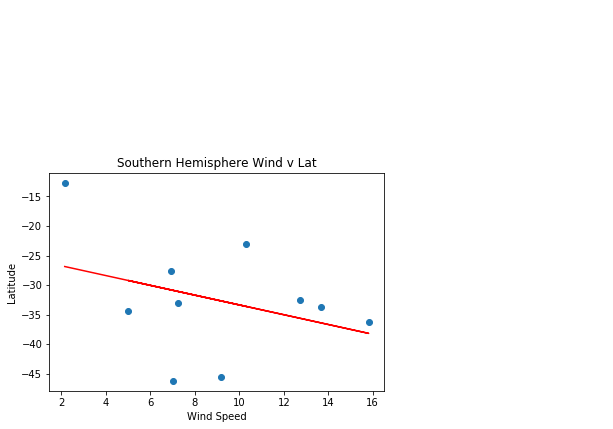

In [18]:
x=[]
y=[]

for index, weatherstuff in southern_df.iterrows():
    try:
        x.append(southern_df['wind'][index]['speed'])
        y.append(southern_df['coord'][index]['lat'])
    except Exception:
        continue

x_value_df = pd.DataFrame(x)        
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
regress_values = x_value_df * slope + intercept
#print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Wind v Lat')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
#print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
